In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook 

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [11]:
class SigmoidNeuron:
    
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")
    
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred 
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
          
      m = X.shape[1]  
      self.w -= learning_rate * dw/m
      self.b -= learning_rate * db/m
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce":
        plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [12]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [13]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


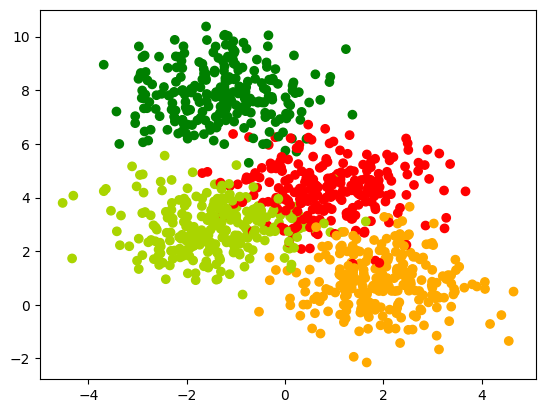

In [14]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [15]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

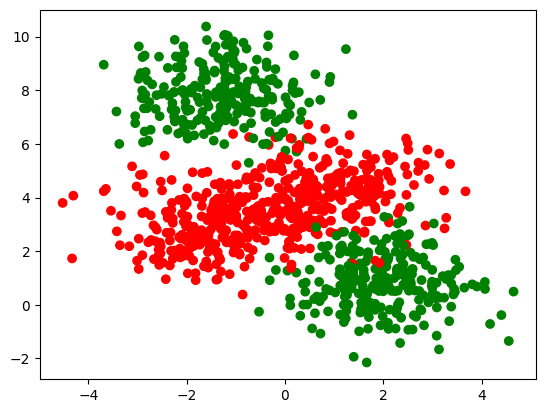

In [16]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [17]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


/tmp/ipykernel_24116/3621503558.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/1000 [00:00<?, ?epoch/s]

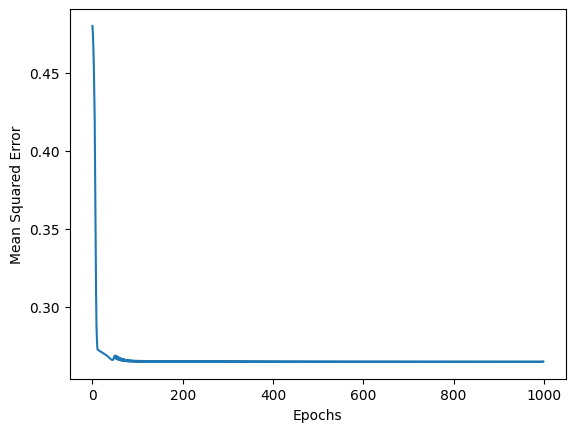

In [18]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs=1000, learning_rate=0.5, display_loss=True)

In [19]:
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = sn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.73
Validation accuracy 0.71


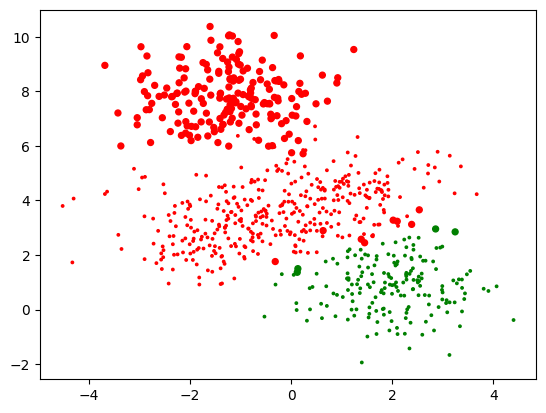

In [20]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

In [4]:
class FirstFFNetwork:
    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward_pass(self, x):
        x1, x2 = x
        a1 = self.w1*x1 + self.w2*x2 + self.b1
        h1 = self.sigmoid(a1)
        a2 = self.w3*x1 + self.w4*x2 + self.b2
        h2 = self.sigmoid(a2)
        a3 = self.w5*h1 + self.w6*h2 + self.b3
        h3 = self.sigmoid(a3)
        return h1, h2, h3

    def grad(self, x, y):
        x1, x2 = x
        h1, h2, h3 = self.forward_pass(x)
        d_output = (h3 - y) * h3 * (1 - h3)
        dw5 = d_output * h1
        dw6 = d_output * h2
        db3 = d_output
        d_h1 = d_output * self.w5 * h1 * (1 - h1)
        dw1 = d_h1 * x1
        dw2 = d_h1 * x2
        db1 = d_h1
        d_h2 = d_output * self.w6 * h2 * (1 - h2)
        dw3 = d_h2 * x1
        dw4 = d_h2 * x2
        db2 = d_h2
        return dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3

    def fit(self, X, Y, epochs=10, lr=0.1, display_loss=False):
        loss_history = []

        for epoch in range(epochs):
            dw1 = dw2 = dw3 = dw4 = dw5 = dw6 = db1 = db2 = db3 = 0
            for x, y in zip(X, Y):
                g = self.grad(x, y)
                dw1 += g[0]; dw2 += g[1]; dw3 += g[2]; dw4 += g[3]
                dw5 += g[4]; dw6 += g[5]; db1 += g[6]; db2 += g[7]; db3 += g[8]

            m = len(X)
            self.w1 -= lr * dw1 / m
            self.w2 -= lr * dw2 / m
            self.w3 -= lr * dw3 / m
            self.w4 -= lr * dw4 / m
            self.w5 -= lr * dw5 / m
            self.w6 -= lr * dw6 / m
            self.b1 -= lr * db1 / m
            self.b2 -= lr * db2 / m
            self.b3 -= lr * db3 / m

            if display_loss:
                Y_pred = self.predict(X)
                loss = np.mean((Y - Y_pred) ** 2)
                loss_history.append(loss)
                print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

        if display_loss:
            plt.plot(loss_history)
            plt.xlabel("Epochs")
            plt.ylabel("MSE Loss")
            plt.show()

    def predict(self, X):
        return np.array([self.forward_pass(x)[2] for x in X])



Epoch 1, Loss: 0.3263
Epoch 2, Loss: 0.3194
Epoch 3, Loss: 0.3128
Epoch 4, Loss: 0.3065
Epoch 5, Loss: 0.3007
Epoch 6, Loss: 0.2953
Epoch 7, Loss: 0.2905
Epoch 8, Loss: 0.2861
Epoch 9, Loss: 0.2821
Epoch 10, Loss: 0.2786
Epoch 11, Loss: 0.2754
Epoch 12, Loss: 0.2726
Epoch 13, Loss: 0.2701
Epoch 14, Loss: 0.2679
Epoch 15, Loss: 0.2659
Epoch 16, Loss: 0.2641
Epoch 17, Loss: 0.2626
Epoch 18, Loss: 0.2612
Epoch 19, Loss: 0.2599
Epoch 20, Loss: 0.2588
Epoch 21, Loss: 0.2578
Epoch 22, Loss: 0.2568
Epoch 23, Loss: 0.2560
Epoch 24, Loss: 0.2552
Epoch 25, Loss: 0.2545
Epoch 26, Loss: 0.2539
Epoch 27, Loss: 0.2533
Epoch 28, Loss: 0.2528
Epoch 29, Loss: 0.2522
Epoch 30, Loss: 0.2518
Epoch 31, Loss: 0.2513
Epoch 32, Loss: 0.2509
Epoch 33, Loss: 0.2505
Epoch 34, Loss: 0.2501
Epoch 35, Loss: 0.2497
Epoch 36, Loss: 0.2493
Epoch 37, Loss: 0.2490
Epoch 38, Loss: 0.2486
Epoch 39, Loss: 0.2483
Epoch 40, Loss: 0.2479
Epoch 41, Loss: 0.2476
Epoch 42, Loss: 0.2473
Epoch 43, Loss: 0.2470
Epoch 44, Loss: 0.24

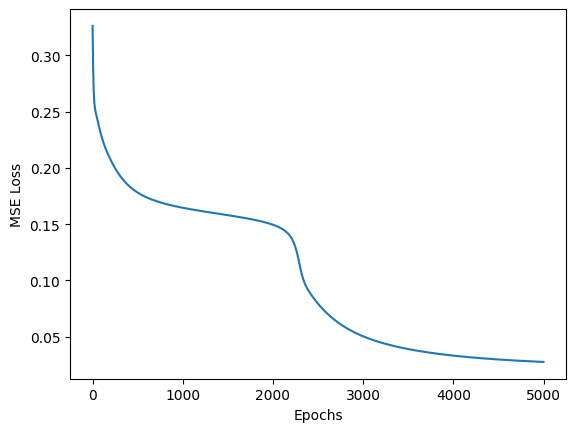

In [21]:
network = FirstFFNetwork()
network.fit(X_train, Y_train, epochs=5000, lr=0.5, display_loss=True)


In [23]:
Y_pred_train = network.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = network.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.97
Validation accuracy 0.94


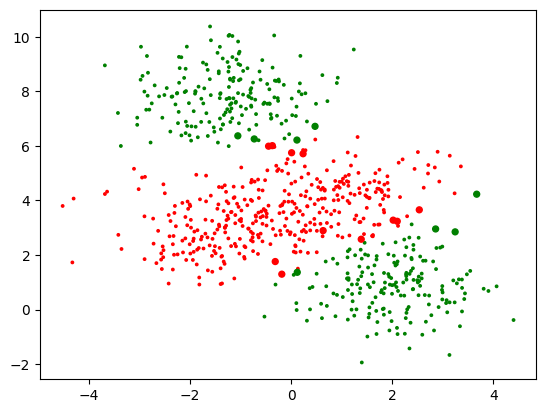

In [24]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

In [25]:
from sklearn.datasets import make_moons, make_circles

In [26]:
data, labels = make_moons(n_samples=1000, random_state=0, noise=0.15)
print(data.shape, labels.shape)

(1000, 2) (1000,)


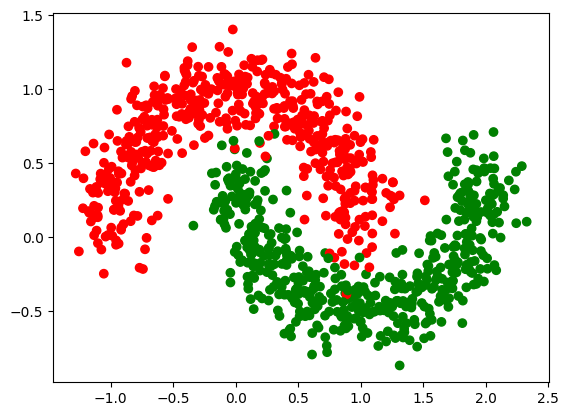

In [27]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [28]:
data, labels = make_circles(n_samples=1000, random_state=0, noise=0.2, factor=0.3)
print(data.shape, labels.shape)

(1000, 2) (1000,)


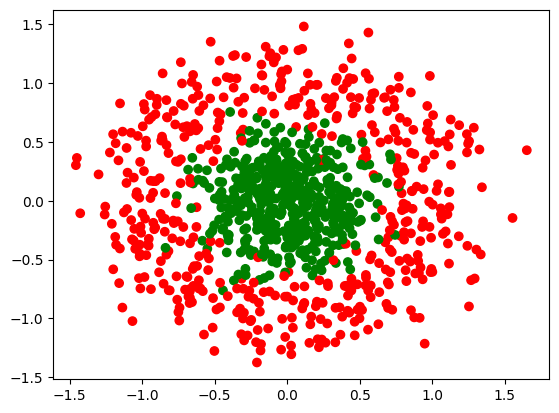

In [29]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()